In [2]:
from typing import Literal
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lass.plotting.shared as shared
from lass.plotting.shared import Baseline, shorten


In [3]:
# results = pd.read_csv('../../../artifacts/csv-results/scaling-0sh/128b.csv')
# results.rename(columns={results.columns[0]: 'task'}, inplace=True)

base = Path("../../../artifacts/csv-results-new/")
path = base / "q1indistribution/deberta-base_bs32_3sh_instance-split-07161413"
# path = base / "q1indistribution/deberta-base_bs32_0sh_instance-split-07161413"
# path = base / "reproduce_rev1_q1/deberta-base_bs32_0sh_instance-split-07161413"

results = shared.load_metrics(path)
results.set_index('task', inplace=True)

results.sample(5)

,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_bs,test_bs_mcb,test_bs_dsc,test_bs_unc,...,test_conf_absolute_accuracy,test_conf_absolute_precision,test_conf_absolute_recall,test_conf_absolute_f1,test_conf_absolute_roc_auc,test_conf_absolute_bs,test_conf_absolute_bs_mcb,test_conf_absolute_bs_dsc,test_conf_absolute_bs_unc,test_conf_absolute_balanced_accuracy
task,,,,,,,,,,,,,,,,,,,,,
conceptual_combinations,0.680828,0.571429,0.500000,0.222222,0.307692,0.500000,0.244516,0.019408,0.019790,0.244898,...,0.523810,0.470588,0.888889,0.615385,0.620370,0.330085,0.150380,0.065193,0.244898,0.569444
word_unscrambling,0.350016,0.873171,0.000000,0.000000,0.000000,0.727761,0.103092,0.010295,0.017947,0.110744,...,0.946341,1.000000,0.576923,0.731707,0.997207,0.029770,0.021437,0.102410,0.110744,0.788462
emojis_emotion_prediction,0.633723,0.750000,0.000000,0.000000,0.000000,0.000000,0.220370,0.032870,0.000000,0.187500,...,0.500000,0.333333,1.000000,0.500000,0.666667,0.349462,0.224462,0.062500,0.187500,0.666667
mult_data_wrangling,0.339050,0.857868,0.902597,0.914474,0.908497,0.901316,0.107932,0.022641,0.090957,0.176248,...,0.878173,1.000000,0.842105,0.914286,0.979825,0.088519,0.053421,0.141150,0.176248,0.921053
codenames,0.525258,0.764706,0.000000,0.000000,0.000000,0.692308,0.172990,0.025931,0.032872,0.179931,...,0.823529,1.000000,0.250000,0.400000,1.000000,0.151457,0.151457,0.179931,0.179931,0.625000


In [4]:
# Show top 5 tasks with highest test_roc_auc
results.sort_values('test_roc_auc', ascending=False).head(5)

,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_bs,test_bs_mcb,test_bs_dsc,test_bs_unc,...,test_conf_absolute_accuracy,test_conf_absolute_precision,test_conf_absolute_recall,test_conf_absolute_f1,test_conf_absolute_roc_auc,test_conf_absolute_bs,test_conf_absolute_bs_mcb,test_conf_absolute_bs_dsc,test_conf_absolute_bs_unc,test_conf_absolute_balanced_accuracy
task,,,,,,,,,,,,,,,,,,,,,
english_proverbs,0.868059,0.142857,0.142857,1.000000,0.250000,1.000000,0.334746,0.334746,0.122449,0.122449,...,0.428571,0.200000,1.000000,0.333333,0.500000,0.367497,0.260354,0.015306,0.122449,0.666667
linguistic_mappings,0.169386,0.927461,0.960630,0.931298,0.945736,0.967003,0.047574,0.009536,0.180009,0.218046,...,0.886010,0.881119,0.961832,0.919708,0.915169,0.093041,0.011481,0.136487,0.218046,0.843819
word_sorting,0.385936,0.809756,0.567568,0.857143,0.682927,0.925955,0.124132,0.040222,0.097981,0.181892,...,0.907317,1.000000,0.612245,0.759494,0.988749,0.065819,0.037436,0.153508,0.181892,0.806122
riddle_sense,0.658327,0.500000,0.500000,1.000000,0.666667,0.920000,0.234047,0.167380,0.183333,0.250000,...,0.400000,0.444444,0.800000,0.571429,0.520000,0.306332,0.086332,0.030000,0.250000,0.400000
mult_data_wrangling,0.339050,0.857868,0.902597,0.914474,0.908497,0.901316,0.107932,0.022641,0.090957,0.176248,...,0.878173,1.000000,0.842105,0.914286,0.979825,0.088519,0.053421,0.141150,0.176248,0.921053


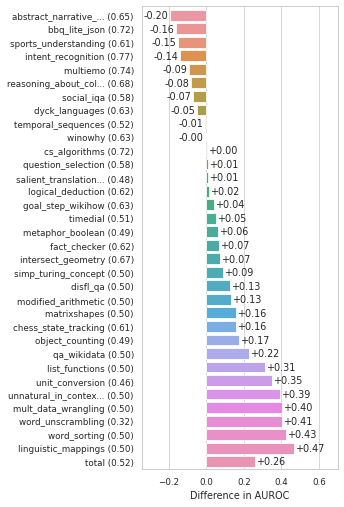

In [43]:
from typing import Optional


def filter_tasks(df: pd.DataFrame, task: str) -> pd.DataFrame:
    return df[df['task'] == task]

def plot_difference(
        sys1: pd.Series,
        sys2: pd.Series,
        sys1_threshold: Optional[float] = None,
        sys2_threshold: Optional[float] = None,
        sort: Literal['name', 'sys1', 'sys2', 'diff'] = 'name',
        xlabel: Optional[str] = None,
    ):
    sns.set_theme(style="whitegrid")
    sns.set_context("paper")

    # Verify that the index is called 'task'
    assert sys1.index.name == 'task'
    assert sys2.index.name == 'task'

    # Combine the two systems into one dataframe
    data = pd.concat([sys1, sys2], axis=1, keys=['sys1', 'sys2'])
    data = data.reset_index() # Make task just a regular column
    data['diff'] = data['sys2'] - data['sys1']

    # Filter out tasks that don't meet the threshold
    if sys1_threshold is not None:
        data = data[data['sys1'] > sys1_threshold]
    if sys2_threshold is not None:
        data = data[data['sys2'] > sys2_threshold]
    
    # Sort the data
    if sort == 'name':
        data = data.sort_values('task')
    elif sort == 'sys1':
        data = data.sort_values('sys1', ascending=False)
    elif sort == 'sys2':
        data = data.sort_values('sys2', ascending=True)
    elif sort == 'diff':
        data = data.sort_values('diff', ascending=True)
    else:
        raise ValueError(f"Invalid sort value: {sort}")

    # Put total at the end
    total = data[data.task == 'total']
    data = data[data.task != 'total']
    data = pd.concat([data, total])

    y = data.apply(lambda x: f"{shorten(x.task, length=22)} ({x.sys1:.2f})", axis=1)

    height = len(data) * 0.25
    plt.figure(figsize=(3.5,height))
    p = sns.barplot(x="diff", y=y, data=data, orient='h')

    # Set the bar labels
    for i in p.containers: # type: ignore
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.5, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.3)

    if xlabel is not None:
        p.set_xlabel(xlabel)

    # return data
# results['test_conf_normalized_roc_auc']
results2 = results[results['instance_count'] >= 100]
plot_difference(
    results2["test_conf_normalized_roc_auc"],
    results2["test_roc_auc"],
    sys1_threshold=0.1,
    sort='diff',
    xlabel="Difference in AUROC",
)

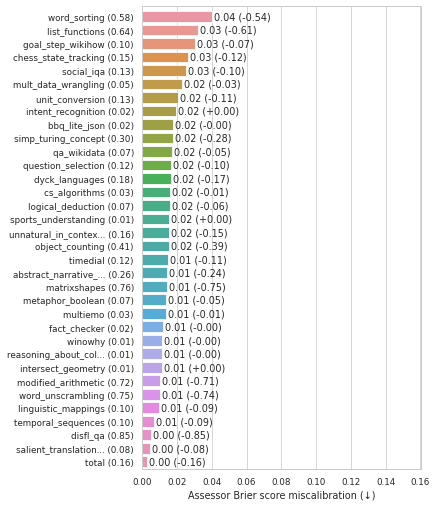

In [40]:
def plot_absolute(
    results: pd.Series,
    reference: pd.Series,
    results_threshold: Optional[float] = None,
    reference_threshold: Optional[float] = None,
    sort: Literal['name', 'results', 'reference', 'diff'] = 'name',
    sort_direction: Literal['asc', 'desc'] = 'asc',
    xlabel: Optional[str] = None,
):
    sns.set_theme(style="whitegrid")
    sns.set_context("paper")

     # Verify that the index is called 'task'
    assert results.index.name == 'task'
    assert reference.index.name == 'task'

    # Combine the two systems into one dataframe
    data = pd.concat([results, reference], axis=1, keys=['results', 'reference'])
    data = data.reset_index() # Make task just a regular column
    data['diff'] = data.results - data.reference

    # Filter out tasks that don't meet the threshold
    if results_threshold is not None:
        data = data[data['results'] > results_threshold]
    if reference_threshold is not None:
        data = data[data['reference'] > reference_threshold]
    
    # Sort the data
    if sort == 'name':
        data = data.sort_values('task', ascending=sort_direction == 'asc')
    elif sort == 'results':
        data = data.sort_values('results', ascending=sort_direction == 'asc')
    elif sort == 'reference':
        data = data.sort_values('reference', ascending=sort_direction == 'asc')
    elif sort == 'diff':
        data = data.sort_values('diff', ascending=sort_direction == 'asc')
    else:
        raise ValueError(f"Invalid sort value: {sort}")

    # Put total at the end
    total = data[data.task == 'total']
    data = data[data.task != 'total']
    data = pd.concat([data, total])

    y = data.apply(lambda x: f"{shorten(x.task, length=22)} ({x.reference:.2f})", axis=1)

    height = len(data) * 0.25
    plt.figure(figsize=(3.5, height))
    p = sns.barplot(x='results', y=y, data=data, orient='h')

    # Set the bar labels
    for i in p.containers: # type: ignore
        labels = [f"{m:.2f} ({diff:+.2f})" for diff, m in zip(data['diff'].values, data.results.values)]
        p.bar_label(i,labels=labels, label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.2, p.get_xlim()[1]*3.8)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.5)
    if xlabel is not None:
        p.set_xlabel(xlabel)

    # # Format x-tick labels only 2 decimal places
    p.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # type: ignore


plot_absolute(
    results2['test_bs_mcb'],
    results2['test_conf_normalized_bs_mcb'],
    sort='results',
    sort_direction='desc',
    xlabel="Assessor Brier score miscalibration (↓)",
)

<BarContainer object of 34 artists>


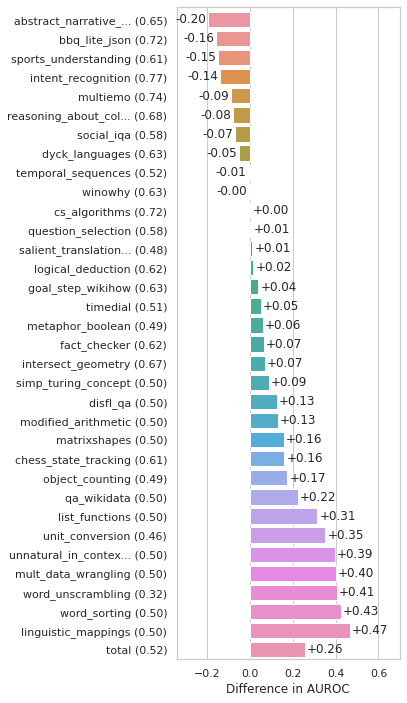

In [6]:

def plot_difference_old(
        df: pd.DataFrame,
        baseline: Baseline = "normalized",
        metric: str = "roc_auc",
        count_threshold: int = 100,
        baseline_threshold: float = 0.1
    ):
    sns.set_theme(style="whitegrid")

    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'instance_count']]
    # data = data[df['test_conf_normalized_roc_auc'] > baseline_threshold]
    data = data[data['instance_count'] > count_threshold]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data.sort_values(by='diff', inplace=True)

    # But _total at the end
    total = data[data['task'] == 'total']
    data = data[data['task'] != 'total']
    data = pd.concat([data, total])

    y = data.apply(lambda x: f"{shorten(x['task'], length=22)} ({x[task_system_col]:.2f})", axis=1)

    # plt.figure(figsize=(10,4))
    # p = sns.barplot(x="task", y="diff", data=data)
    plt.figure(figsize=(4,12))
    p = sns.barplot(x="diff", y=y, data=data, orient='h')
    # p.set_xticklabels(p.get_xticklabels(), rotation=90)
    # p.set_title(f"Assessor {metric} minus BIG-G {baseline} {metric}")
    for i in p.containers: # type: ignore
        print(i)
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.5, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.3)

    p.set_xlabel("Difference in AUROC")

    # return data

# plot(results, metric="accuracy")
plot_difference_old(results.reset_index(), metric="roc_auc", baseline="normalized", count_threshold=100)

In [7]:
def shorten(x, length=15):
    if len(x) > length:
        return x[:length-3] + "..."
    else:
        return x

def plot2(df: pd.DataFrame, baseline: Baseline = "normalized", metric: str = "roc_auc"):
    sns.set_theme(style="whitegrid")
    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'count']]
    data = data[df['test_conf_normalized_roc_auc'] > 0.1]
    data = data[data['count'] > 100]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data['task'] = data['task'].apply(lambda x: shorten(x, length=22))
    # data.loc[df['task'] == "formal_fallacies_syllogisms_negation", 'task'] = "formal_fallacies_syllogisms_neg."
    # data.loc[df['task'] == "salient_translation_error_detection", 'task'] = "salient_translation_error_detect."

    # Sorting and adding total
    data.sort_values(by='diff', inplace=True)
    print(len(data))
    total = data[data['task'] == '_total']
    data = data[data['task'] != '_total']
    # data = data.append([{}], ignore_index=True)
    data = data.append(total)

    plt.figure(figsize=(4,12))
    
    y = data.apply(lambda x: f"{x['task']} ({x[task_system_col]:.2f})", axis=1)
    p = sns.barplot(y=y, x="diff", data=data, orient='h')
    for i in p.containers:
        print(i)
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.6, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.5)

    # disable x-axis labels
    p.set_xlabel("Difference in AUROC")
    plt.savefig(f'../artifacts/plots/main.svg', bbox_inches='tight', format='svg')

# plot(results, metric="accuracy")
plot2(results, metric="roc_auc")

KeyError: "['task', 'count'] not in index"

KeyError: "['task', 'count'] not in index"